# Computer Infrastructure Assignment - Winter 2025

## YFinance Assessment


In this notebook, I download, process, visualize, and automate stock price data for the five FAANG companies: Meta, Apple, Amazon, Netflix, and Google.

My workflow:

- <b>Download hourly stock price data</b> for the past five days.

- <b>Save the data</b> in CSV format with timestamped filenames.

- <b>Plot the closing prices</b> for all five stocks.

- <b>Create an executable script</b> to run the workflow from the terminal.

- <b>Automate the workflow</b> using GitHub Actions to run the script every Saturday morning. 

### Python Libraries Used in This Project

Python is a popular high-level, interpreted general-purpose programming language, known for its readability and simplicity (GeeksforGeeks, 2025). This notebook uses several libraries to download, process, visualize, and automate FAANG stock data:

- **datetime** provides classes for working with dates and times, allowing for arithmetic, formatting, and extraction ([Python](https://docs.python.org/3/library/datetime.html)). I use it to timestamp CSV and plot filenames and to handle date-based operations.

- **glob** finds files and directories whose names match a specified pattern, using Unix-style wildcards like *, ?, and [] ([Python](https://docs.python.org/3/library/glob.html)). I use it to locate the most recent CSV file for plotting.

- **os** provides functions to interact with the operating system, such as managing files and directories, handling environment variables, and controlling processes ([Python](https://docs.python.org/3/library/os.html)). I use it to extract filenames for formatting dates.

- **pandas** is an open-source data analysis and manipulation tool. It handles tabular and columnar data and is useful for cleaning, processing, and reading/writing datasets in formats like CSV ([GeeksforGeeks, 2025](https://www.geeksforgeeks.org/pandas-tutorial/)). I use it to store, clean, and process stock data, and to read and write CSV files.

- **matplotlib.pyplot** is a data visualization library that offers a wide range of plotting functionalities ([GeeksforGeeks, 2025](https://www.geeksforgeeks.org/matplotlib-tutorial/), [W3Schools](https://www.w3schools.com/python/matplotlib_pyplot.asp)). I use it to plot FAANG closing prices with labels, legends, and grid formatting. 

- **yfinance** enables downloading and analyzing financial data from Yahoo Finance, including historical prices, stock information, and market trends ([GeeksforGeeks](https://www.geeksforgeeks.org/python/how-to-use-yfinance-api-with-python/)). I use it to retrieve hourly FAANG stock data for the past five days.


In [ ]:
# Standard library imports
import datetime as dt
import glob
import os

# Third-party imports
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

## Problem 1: Data from yfinance

In this section I will use the yfinance Python package, already installed above.  

I will write a function called *get_data()* that downloads all hourly data for the previous five days for the five FAANG stocks:

- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)

The function will then save the retrieved data into the <b>data</b> folder using a timestamped filename in the format YYYYMMDD-HHmmss.csv.

<b>Step 1: Downloading Data</b>

In [9]:
# Collect data for all FAANG stocks over the past 5 days
df = yf.download(
    tickers=["META", "AAPL", "AMZN", "NFLX", "GOOG"],
    period="5d"
)

# Preview the first 3 rows
df.head(3)

/tmp/ipykernel_8509/4007900936.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(
[*********************100%***********************]  5 of 5 completed


Price            Close                                                  \
Ticker            AAPL        AMZN        GOOG        META        NFLX   
Date                                                                     
2025-11-28  278.850006  233.220001  320.119995  647.950012  107.580002   
2025-12-01  283.100006  233.880005  315.119995  640.869995  109.129997   
2025-12-02  286.190002  234.419998  316.019989  647.099976  109.349998   

Price             High                                                  ...  \
Ticker            AAPL        AMZN        GOOG        META        NFLX  ...   
Date                                                                    ...   
2025-11-28  279.000000  233.289993  326.880005  648.049988  107.940002  ...   
2025-12-01  283.420013  235.800003  319.630005  645.320007  109.339996  ...   
2025-12-02  287.399994  238.970001  318.600006  647.869995  109.730003  ...   

Price            Open                                                  \
Ticker           AAPL        AMZN        GOOG        META        NFLX   
Date                                                                    
2025-11-28  277.26001  231.240005  323.429993  636.080017  106.440002   
2025-12-01  278.01001  233.220001  317.475006  639.549988  106.510002   
2025-12-02  283.00000  235.009995  316.899994  642.340027  109.209999   

Price         Volume                                          
Ticker          AAPL      AMZN      GOOG      META      NFLX  
Date                                                          
2025-11-28  20135600  20292300  19695800  11033200  15021600  
2025-12-01  46587700  42904000  28520600  13029900  24873400  
2025-12-02  53669500  45785400  24668200  11640900  25763000  

[3 rows x 25 columns]

To download the data for FAANG over the last five days, I used the offical [yfinace](https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html) documentation.

<b>Step 2: Creating Function</b>  

This section creates the function that downloads all hourly data for the previous five days.

In [10]:
def get_data():
    """Downloads past 5 days of hourly data for FAANG stocks."""
    
    tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOG"]

    data = yf.download(
        tickers=tickers,
        period="5d",
        interval="1h",
        auto_adjust=False
    )

    return data

To create the function, I followed the steps outlined in the [Real Python tutorial](https://realpython.com/defining-your-own-python-function/).  
[Official yfinance documentation](https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html) was used to download all hourly data over the past five days for each faang stock.  
I set the <i>auto_adjust=False</i> parameter to keep the raw prices [Official yfinance documentation](https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html).

<b>Step 3: Saving Dataframe</b>

I saved the dataframe to a csv file in <b>data</b> folder.  
The dataframe was saved using a filename with the format of the current local date and time: YYYYMMDD-HHmmss.csv. 

In [11]:
# Get local date & time
local = dt.datetime.now().strftime("%Y%m%d-%H%M%S")

# Save data as CSV
get_data().to_csv(
    "./data/"  # save to data folder
    + local
    + ".csv"
)

[*********************100%***********************]  5 of 5 completed


<b>Below contains an explanation of the above code</b>

- *local = dt.datetime.now().strftime("%Y%m%d-%H%M%S")*  
Retrieves the current local date and time and formats it as a string like <i>20251205-143000</i> for use in filenames [Official Python documentation](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior).

- <i>get_data</i>  
Calls the function that retrieves the data to be saved.

- <i>.to_csv(...)</i>  
Saves the DataFrame returned by <i>get_data()</i> to a CSV file. The path combines the folder <i>"./data/"</i> with the timestamp string <i>local</i> and the <i>.csv</i> extension [Official pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html). 

- Line breaking inside <i>.to_csv(...)</i>  
Placing the filename expression on multiple lines improves readability while remaining valid Python syntax, in line with [PEP 8 formatting](https://www.python.org/dev/peps/pep-0008/#maximum-line-length)

## Problem 2: Plotting Data

In this section, I wrote a function called plot_data() that completes the following:  

- Opens the most recent CSV file from the data folder.  

- Plots the Close prices for all five stocks on a single figure.

I then added the following enhancements to the plot:  

- Axis labels  

- A legend indicating each stock  

- A title showing the current date  

- The function saves the plot as a PNG file in the <b>plots</b> folder at the root of my repository.  

- The filename uses the format YYYYMMDD-HHmmss.png (e.g., 20251205-143000.png).

In [12]:
# View columns
get_data().columns

[*********************100%***********************]  5 of 5 completed


MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'AMZN'),
            ('Adj Close', 'GOOG'),
            ('Adj Close', 'META'),
            ('Adj Close', 'NFLX'),
            (    'Close', 'AAPL'),
            (    'Close', 'AMZN'),
            (    'Close', 'GOOG'),
            (    'Close', 'META'),
            (    'Close', 'NFLX'),
            (     'High', 'AAPL'),
            (     'High', 'AMZN'),
            (     'High', 'GOOG'),
            (     'High', 'META'),
            (     'High', 'NFLX'),
            (      'Low', 'AAPL'),
            (      'Low', 'AMZN'),
            (      'Low', 'GOOG'),
            (      'Low', 'META'),
            (      'Low', 'NFLX'),
            (     'Open', 'AAPL'),
            (     'Open', 'AMZN'),
            (     'Open', 'GOOG'),
            (     'Open', 'META'),
            (     'Open', 'NFLX'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'AMZN'),
            (   'Volume', 'GOOG'),
            (   'Vol

I used the above code to view the column headers of the DataFrame returned by <i>get_data()</i> so I could check the structure of the data before creating the plot. This allowed me to confirm that the expected columns (e.g., Open, Close, High, Low for each FAANG stock) were present and ensure my plotting function would reference the correct data [Official pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html)

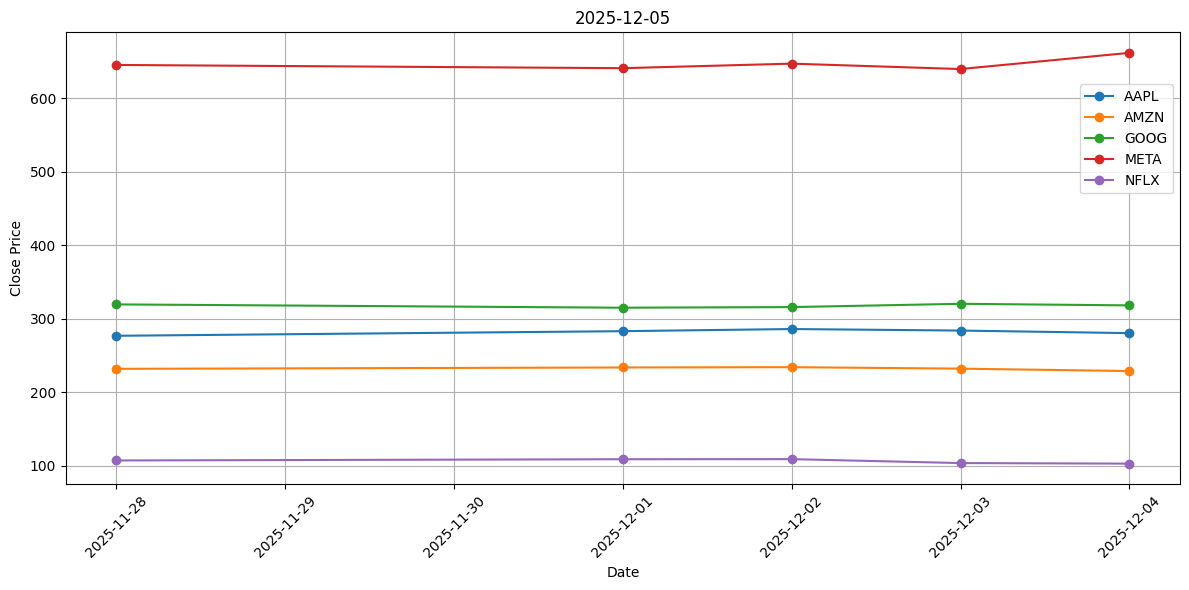

In [ ]:
def plot_data():
    # Get all files from the data folder
    list_of_files = glob.glob("./data/*")
    # Get the latest file
    latest_file = max(list_of_files, key=os.path.getctime)

    # Read CSV with multi-index headers
    df2 = pd.read_csv(latest_file, header=[0, 1], index_col=0)
    # Convert index to datetime to allow for date formatting
    df2.index = pd.to_datetime(df2.index)

    # Define tickers
    faang = ["AAPL", "AMZN", "GOOG", "META", "NFLX"]

    # Extract date from filename and format for readability
    date_str = os.path.basename(latest_file).split("-")[0]
    date = dt.datetime.strptime(date_str, "%Y%m%d").strftime("%Y-%m-%d")

    # Group by date and take last close price of each day
    last_per_day = df2["Close"][faang].groupby(df2.index.date).last()
    # Select last 5 days
    last_5_days = last_per_day.tail(5)

    # Plot data
    last_5_days.plot(figsize=(12, 6), marker="o")  # Set figsize and markers for clarity

    # Add titles and labels
    plt.title(f"{date}")
    plt.xticks(rotation=45)  # Rotate x-axis for readability
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend(loc="upper right", bbox_to_anchor=(1, 0.9)) # Adjust position of ledgend
    plt.grid(True)
    plt.tight_layout()

    # Save plot
    filename = os.path.join("./plots", f"{local}.png")
    plt.savefig(filename, dpi=300)

    plt.show()


plot_data()

<b>Below contains an explanation of the above code</b>  

- <i>list_of_files = glob.glob("./data/*")</i>  
Retrieves a list of all files in the data folder using a pattern match [GeeksforGeeks](https://www.geeksforgeeks.org/python/how-to-use-glob-function-to-find-files-recursively-in-python/), [sqlpey](https://sqlpey.com/python/top-10-methods-to-retrieve-latest-file-in-a-folder-using-python/).

- <i>latest_file = max(list_of_files, key=os.path.getctime)</i>  
Selects the most recently created file by checking each file’s creation time [sqlpey](https://sqlpey.com/python/top-10-methods-to-retrieve-latest-file-in-a-folder-using-python/).

- <i>df2 = pd.read_csv(latest_file, header=[0, 1], index_col=0)</i>  
Reads the CSV into a DataFrame with multi-level headers and sets the first column as the index [Official pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

- <i>df2.index = pd.to_datetime(df2.index)</i>  
Converts the index to datetime format to enable date-based operations and plotting. [Official pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html), [Official pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html).

- <i>faang = ["AAPL", "AMZN", "GOOG", "META", "NFLX"]</i>  
Defines a list of the stock tickers to plot.

- <i>date_str = os.path.basename(latest_file).split("-")[0]</i>  
Extracts the date portion from the filename [GeeksforGeeks](https://www.geeksforgeeks.org/python/python-os-path-basename-method/).

- <i>date = dt.datetime.strptime(date_str, "%Y%m%d").strftime("%Y-%m-%d")</i>  
Parses the date string from the filename and formats it as YYYY-MM-DD [GeeksforGeeks](https://www.geeksforgeeks.org/python/python-datetime-strptime-function/), [GeeksforGeeks](https://www.geeksforgeeks.org/python/python-strftime-function/).

- <i>last_per_day = df2["Close"][faang].groupby(df2.index.date).last()</i>  
Groups the Close prices by day and selects the last value for each stock [Official pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html), [Official pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.last.html). 

- <i>last_5_days = last_per_day.tail(5)</i>  
Selects the last 5 days of data from the grouped DataFrame [Official pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html).

- <i>last_5_days.plot(figsize=(12, 6), marker="o")</i>  
Plots the data with specified figure size and markers for clarity [Official pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

- <i>plt.title(f"{date}") / plt.xlabel / plt.ylabel / plt.xticks / plt.legend / plt.grid / plt.tight_layout()</i>  
Adds titles, axis labels, rotates x-axis labels, positions the legend, enables grid, and adjusts layout for readability [Matplotlib documentation](https://matplotlib.org/stable/users/index.html).

- <i>filename = os.path.join("./plots", f"{local}.png")</i>  
Constructs the full path for saving the plot file [GeeksforGeeks](https://www.geeksforgeeks.org/python/python-os-path-join-method/).

- <i>plt.savefig(filename, dpi=300)</i>  
Saves the figure as a high-resolution PNG file [Matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html).

- <i>plt.show()</i>  
Displays the plot in the notebook.

## Problem 3: Script

The purpose of Problem 3 is to take the functions developed in Problems 1 and 2 and turn them into an executable Python script called faang.py.
The script is required to run directly from the terminal for all users using the command ./faang.py.

Below, I outline the steps I follow, along with references to the documentation used to research each part of the process.

<b>Step 1: Creating faang.py File</B>

I create a new Python script in the root of my repository named *faang.py*.
This file contains the logic required to download and plot FAANG stock data, allowing the workflow to run independently of the Jupyter notebook.

<b>Step 2: Adding Shebang Line</b>  

At the top of the file, I add the following shebang line:

#!/usr/bin/env python3

This line tells the operating system to run the script using Python 3 and allows it to be executed directly from the terminal using *./faang.py* ([Real Python](https://realpython.com/python-shebang/)).  
I use *env* to make the script more portable, as it locates the correct Python interpreter on the system rather than relying on a fixed path ([Real Python](https://realpython.com/python-shebang/)). 

<b>Step 3: Copying Functions into Script</b>  

Below the shebang line, I include all required imports and copy the two functions created earlier:

- the get_data() function from Problem 1

- the plot_data() function from Problem 2

This ensures the script can download FAANG stock data and generate plots without requiring the notebook.

<b>Step 4: Making the Script Executable</b>  
  
To allow the script to be run like a program, I make it executable by running the Linux command in the terminal:

*chmod +x faang.py*

The chmod command is used to change file permissions, + symbol adds permissions, and the x flag grants execute permission ([GeeksforGeeks](https://www.geeksforgeeks.org/linux-unix/what-does-chmod-x-do-and-how-to-use-it/)).

I then run the command ls -l to verify that the permissions have been updated correctly and that faang.py is marked as executable.
The ls -l command displays files and directories in a detailed format, including permission settings and file metadata ([Red Hat](https://www.redhat.com/en/blog/linux-file-permissions-explained?utm_source=chatgpt.com)). 

<b>Step 5: Running Script</b>  

Finally, I run the script from the terminal using:

*./faang.py*

Running the script executes the full FAANG workflow and confirms that:

- FAANG stock data is downloaded successfully

- the CSV file is saved in the data folder

- the plot is generated and saved in the plots folder

Creating **faang.py** also allows the script to be reused in automated workflows, such as the GitHub Actions pipeline described in Problem 4.

## Problem 4: Automation

In this section, I automate my FAANG workflow using GitHub Actions. The workflow runs my **faang.py** script every Saturday morning, commits any new CSV or plot files, and pushes them to the repository. This ensures that my repository always contains up-to-date data without manual intervention.

**Workflow Name**  

- *name: Run faang.py and push changes*  

This line names the workflow, which appears in the GitHub Actions interface and helps me or a reviewer quickly understand the purpose of the workflow ([GitHub Actions Documentation](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax#name))

**Workflow Triggers**

- *on:*  

This line defines the events that will trigger the workflow ([GitHub Actions Docs](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax#on)).

- *workflow_dispatch:*  

This line allows me to manually trigger the workflow from GitHub whenever I want, giving me control over when it runs ([GitHub Actions Docs](https://docs.github.com/en/actions/reference/workflows-and-actions/events-that-trigger-workflows#workflow_dispatch)).

- *schedule:*  

This line defines a cron-based schedule for automatically running the workflow at specified times. I use it so the workflow runs every Saturday without manual intervention. GitHub Actions supports scheduled workflows using standard cron syntax ([GitHUb Actions Docs](https://docs.github.com/en/actions/reference/workflows-and-actions/events-that-trigger-workflows#scheduled-events)).

- *cron: "24 10 * * 6"*  

This line specifies the cron expression, which runs the workflow at 10:24 UTC every Saturday. I verified the timing using [Crontab Guru](https://crontab.guru/#24_10_*_*_6). This ensures data updates occur every Saturday morning without my intervention.

**Permissions**  

- *permissions:*  

This line defines the access rights of the workflow. I use it to specify what the workflow is allowed to do with the repository ([GitHub Actions Docs](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax)). It controls the actions the workflow can perform, including committing changes.


- *contents:write*  

This line gives the workflow write access to repository contents, which allows me to commit and push updated CSV and plot files automatically. I use this so my repository is always up to date. GitHub documentation confirms that contents: write is needed for workflows to modify repository files ([GitHub Actions Docs](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax)).

**Jobs**  

- *jobs:*  

This line defines one or more jobs to run as part of the workflow. A job is a series of steps executed in a specific environment ([GitHub Actions Docs](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax#jobs)).

- *run-faang-script:*  

This line names the job so it is easy to identify in the Actions interface ([GitHub Actions Docs](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax#jobs)).

- *runs-on: ubuntu-latest*  

This line specifies the virtual machine environment where the job runs. Ubuntu Linux is used because it has Python and Git preinstalled ([GitHub Actions Docs](https://docs.github.com/en/actions/concepts/runners/github-hosted-runners)).

**Steps within the Jobs**

**Step 1: Check out repository**  

- *name: Check out repository*  

This line names the step ([GitHub Actions Docs](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax#jobs)).

- *uses: actions/checkout@v4*  

This line clones the repository into the workflow runner so all files, including faang.py, are available ([GitHub](https://github.com/actions/checkout)).

- *with:*  

This line provides configuration options for the checkout action ([GitHub Actions Docs](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax)).

- *persist-credentials: true*  

This line keeps Git credentials in the runner so the workflow can commit and push changes ([GitHub](https://github.com/actions/checkout)).

- *fetch-depth: 0*

This line retrieves the full Git history, which is required to correctly commit changes to the repository ([GitHub](https://github.com/actions/checkout)). 

**Step 2: Set up Python**  

- *name: Set up Python*  

This line names the step.

- *uses: actions/setup-python@v5*  

This line installs Python in the runner environment so I can run my faang.py script ([GitHub](https://github.com/actions/setup-python)).

- *with:*  

This line provides configuration options for Python setup.

- *python-version: "3.x"*  

This line ensures the runner uses the latest Python 3 version, which my script requires ([GitHub Actions Docs](https://docs.github.com/en/actions/tutorials/build-and-test-code/python)). Using "3.x" also improves future compatibility, as the workflow automatically uses newer Python 3 releases without requiring changes to the workflow file.

**Step 3: Install dependencies**  

- *name: Install dependencies*  

This line names the step.

- *run: |*  

This line tells GitHub Actions that the step should execute one or more shell commands on the workflow runner ([GitHub Actions Docs](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax#jobsjob_idstepsrun)). When I use *run:*, GitHub Actions opens a command-line shell (Bash by default on Ubuntu runners) and runs the commands I specify ([GitHUb Actions Docs](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax#using-a-specific-shell)). 

- *pip install -r requirements.txt || true*  

This line installs all packages listed in *requirements.txt* using pip ([pip Documentation
](https://pip.pypa.io/en/stable/cli/pip_install/)). The *|| true* part prevents workflow failure if requirements.txt does not exist or is empty, making the workflow more robust
The *|| true* part tells the workflow to continue running even if the command fails ([Bash Reference Manual](https://www.gnu.org/software/bash/manual/html_node/Lists.html)). I include this to prevent the workflow from failing if *requirements.txt* is missing or empty.
In my project, this makes the workflow more fault-tolerant, especially during testing or if the repository is cloned without a populated *requirements.txt*.
However, if I am confident that *requirements.txt* always exists and is correct, I could safely remove *||* true and allow the workflow to fail early if dependencies are missing.

**Step 4: Run faang.py**  

- *name: Run faang.py*  

This line names the step.

- *run: |*  

This line tells GitHub Actions that the step should execute one or more shell commands on the workflow runner ([GitHub Actions Docs](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax#jobsjob_idstepsrun)). When I use *run:*, GitHub Actions opens a command-line shell (Bash by default on Ubuntu runners) and runs the commands I specify ([GitHub Actions Docs](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax#using-a-specific-shell)). 

- *python faang.py*  

This line executes my FAANG workflow script, which downloads hourly stock data, generates plots, and saves them in the *data/* and *plots/* folders ([Python](https://docs.python.org/3/tutorial/index.html)).

**Step 5: Commit changes**  

- *name: Commit changes* 

This line names the step.

- *run: |*  

This line tells GitHub Actions that the step should execute one or more shell commands on the workflow runner ([GitHub Actions Docs](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax#jobsjob_idstepsrun)). When I use *run:*, GitHub Actions opens a command-line shell (Bash by default on Ubuntu runners) and runs the commands I specify ([GitHub Actions Docs](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax#using-a-specific-shell)).

- *git config --global user.name "github-actions"*  

This line sets the Git username for the automated commit ([Git](https://git-scm.com/docs/git-config)).

- *git config --global user.email "github-actions@github.com"*  

This line sets the Git email for the automated commit ([Git](https://git-scm.com/docs/git-config)).

- *git add data plots*  

This line stages any new or updated files in *data/* and *plots/* for commit ([Git](https://git-scm.com/docs/git-add)).

- *git commit -m "Automated FAANG data update" || echo "No changes to commit"*  

This part commits the changes with a message. The *|| echo "No changes to commit"* part prevents workflow failure if there are no updates to commit: [Bash Manual](https://www.gnu.org/software/bash/manual/html_node/Lists.html), [Git](https://git-scm.com/docs/git-commit).


**Step 6: Push changes**  

- *name: Push changes*  

This line names the step.

- *run: |*  

This line tells GitHub Actions that the step should execute one or more shell commands on the workflow runner ([GitHub Actions Docs](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax#jobsjob_idstepsrun)). When I use *run:*, GitHub Actions opens a command-line shell (Bash by default on Ubuntu runners) and runs the commands I specify ([GitHub Actions Docs](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax#using-a-specific-shell)). 

- *git push origin HEAD*   

This line pushes the committed changes to the current branch in the repository ([Git](https://git-scm.com/docs/git-push)). This ensures the latest CSVs and plots are available online automatically.

## End